## Goals
Consider 3 charge distributions: a 1D case and two 2D cases. 

First, a charged line,
$$\lambda(x) = 2x; 0 < x < 1$$

Second, a charged ’L’ made from two charged lines - one parallel to the x axis and the other parallel to the y axis
$$
\begin{align}
    \lambda(x; y) &= x^2, 0 < x < 1\\
                  &= y, 1 < y < 2
\end{align}
$$

Third, a charge disk in the x-y plane, centered at the origin plane with a radius of 2 and a charge distribution of
$$
\sigma(r,\phi)=rcos(\phi)
$$

Write a program in Python and MATLAB to calculate the (i) electric potential and (ii) electric field in the vicinity of
each charge distribution. Graph the electric potential and electric field (try a 3D plot for the field).


$$
V(\vec{r}) = \frac{1}{4\pi\epsilon_0}\int \frac{\rho (\vec{r}')}{|\vec{r}-\vec{r}'|} d^3r'
$$
$$
E(\vec{r}) = - \nabla V(\vec{r})
$$

In rectangular coordinate,
$$
V(x,y,z) = \frac{1}{4\pi\epsilon_0}\int \frac{\rho (x',y',z')}{\sqrt{(x-x')^2+(y-y')^2+(z-z')^2}} dx'dy'dz'
$$


In [33]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

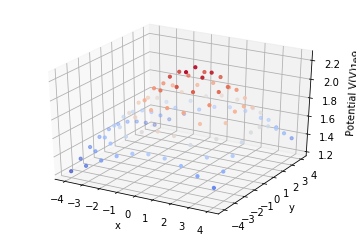

In [126]:
epsilon_0 = 8.85e-12        #vacuum permittivity in F/m

N = 10
V = np.zeros((N,N,N))
xrange = np.linspace(-4,4,N)
yrange = np.linspace(-4,4,N)
zrange = np.linspace(-4,4,N)

xv, yv, zv = np.meshgrid(xrange,yrange,zrange,indexing='ij')

for i in range(N):
    for j in range(N):
        for k in range(N):
            x = xrange[i]
            y = yrange[j]
            z = zrange[k]
            f1 = lambda xp: 1/(4*np.pi*epsilon_0)* 2*xp/np.sqrt((x - xp)**2 + y**2 + z**2)
            V[i,j,k], Verr = quad(f1,0,1,points=0)

Vflat = V[:,:,0].ravel()



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xv[:,:,0],yv[:,:,0],V[:,:,0],s=10,c=Vflat,cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential V(V)')
plt.show()



In [127]:
Ex, Ey, Ez = np.gradient(-V)

E = np.sqrt(Ex**2+Ey**2+Ez**2)
Ex, Ey, Ez = Ex/E, Ey/E, Ez/E
rgb = E/np.amax(E)


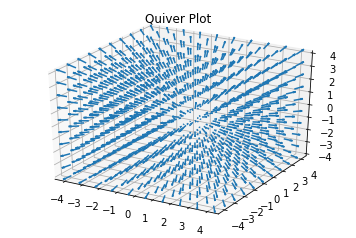

In [128]:
ax = plt.axes(projection='3d')
ax.quiver(xv, yv, zv, Ex, Ey, Ez, length=0.5, normalize='False', cmap='coolwarm')
ax.set(title='Quiver Plot')
plt.show()